In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import io
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [0]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head(5)

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

**Clean the data**

In [0]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

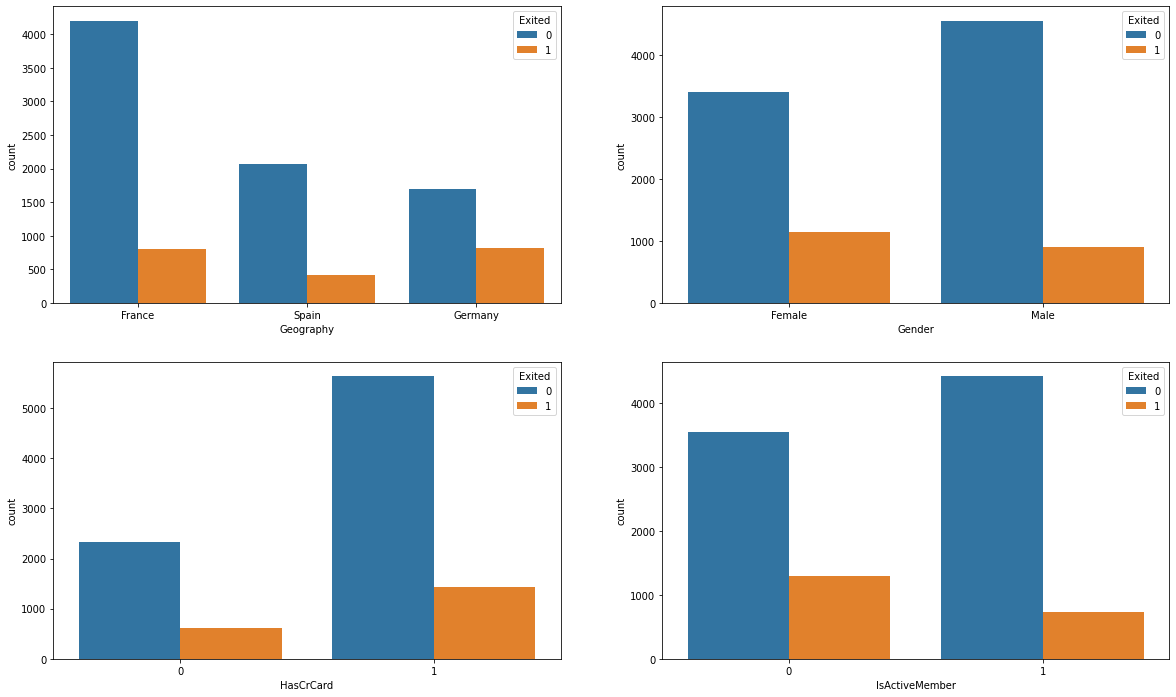

In [7]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])


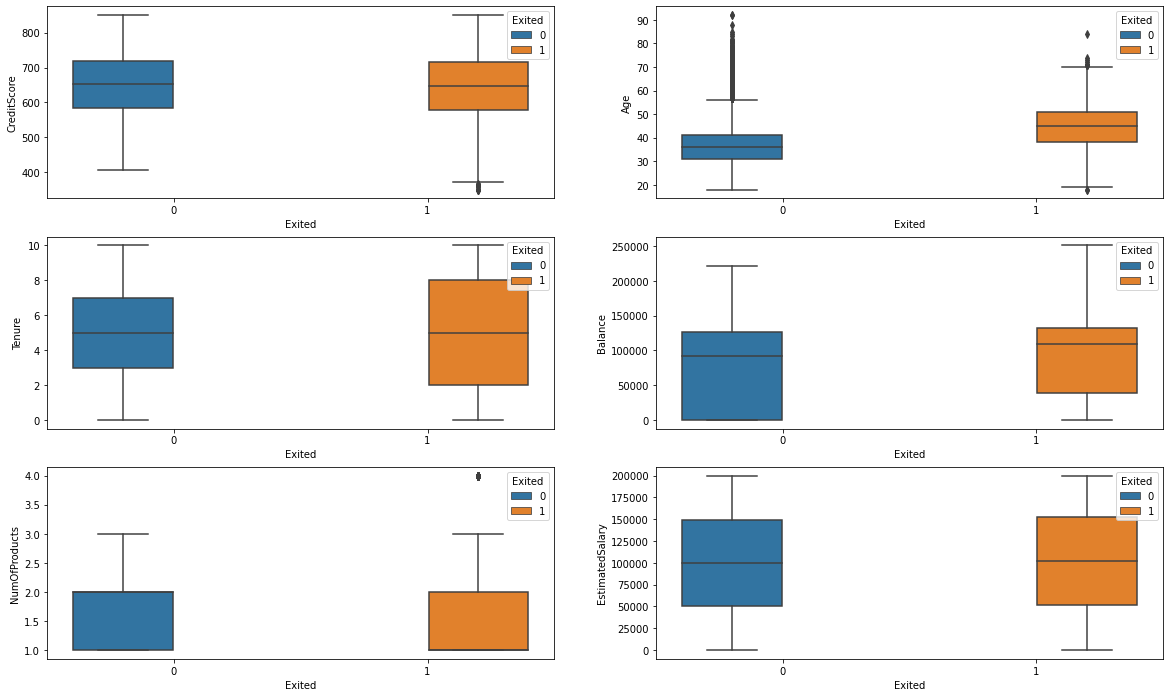

In [8]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])
plt.show()

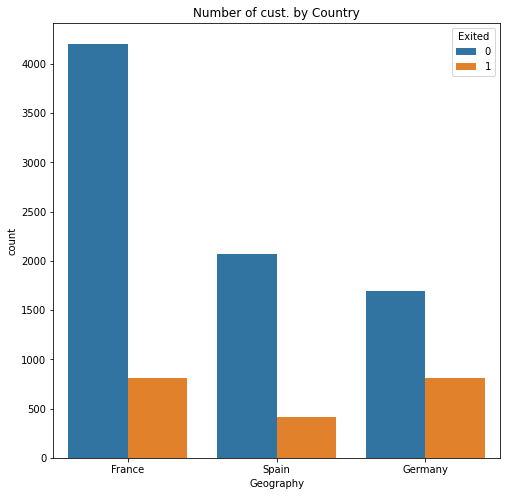

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(x='Geography',hue='Exited',data=df)
plt.title('Number of cust. by Country')
plt.show()

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

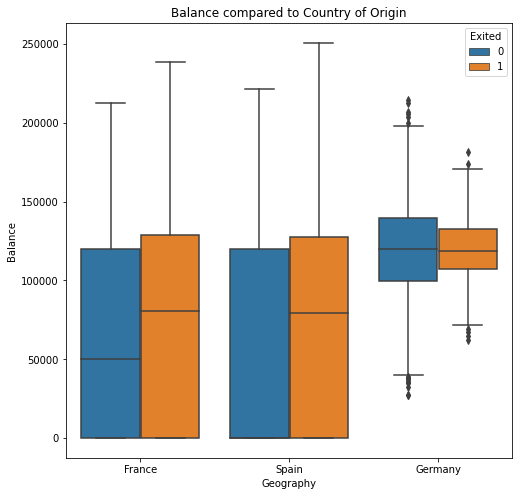

In [11]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Geography',y='Balance',hue='Exited',data=df)
plt.title('Balance compared to Country of Origin')
plt.show()

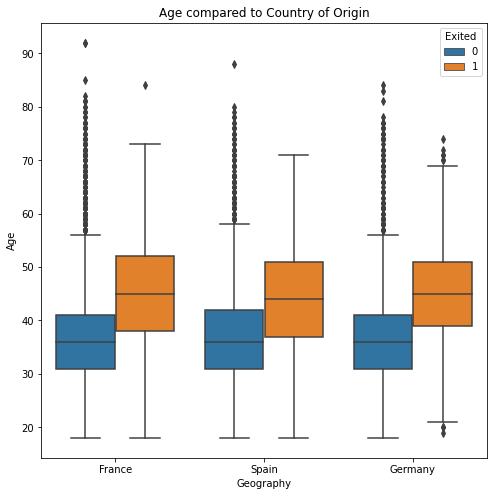

In [12]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Geography',y='Age',hue='Exited',data=df)
plt.title('Age compared to Country of Origin')
plt.show()

In [0]:
data1=df

In [0]:
df=pd.get_dummies(df)

In [0]:
df.drop(['Geography_Spain','Gender_Female'],axis=1,inplace=True)

In [16]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Gender_Male'],
      dtype='object')

In [17]:
df.head(5)

CreditScore  Age  Tenure  ...  Geography_France  Geography_Germany  Gender_Male
0          619   42       2  ...                 1                  0            0
1          608   41       1  ...                 0                  0            0
2          502   42       8  ...                 1                  0            0
3          699   39       1  ...                 1                  0            0
4          850   43       2  ...                 0                  0            0

[5 rows x 12 columns]

**Split the data**

In [0]:
X=df.drop(['Exited'],axis=1)
y=df.Exited.values

In [0]:
seed = 5
np.random.seed(seed)
tf.random.set_seed(seed)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Normalization process**

In [0]:
# Define the normalized function
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

In [0]:
# Normalized processing, must be placed after the data set segmentation, 
# otherwise the test set will be affected by the training set
train_X = min_max_normalized(X_train)
test_X = min_max_normalized(X_test)

**Model framework**

In [0]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, A's dimension is (4, 1)
A = tf.Variable(tf.random.normal(shape=[4, 1]))
b = tf.Variable(tf.random.normal(shape=[1, 1]))
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
#sess.run(init)

In [27]:
mod = tf.matmul(data, A) + b

NameError: ignored